# Seebeck and Peltier Effect

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
%matplotlib inline

In [3]:
s1data = pd.read_excel('Thermogenerator.xlsx', sheet_name='S1')
s21data = pd.read_excel('Thermogenerator.xlsx', sheet_name='S2_1')
s22data = pd.read_excel('Thermogenerator.xlsx', sheet_name='S2_2')
s3data = pd.read_excel('Thermogenerator.xlsx', sheet_name='S3')
s4data = pd.read_excel('Thermogenerator.xlsx', sheet_name='S4')

In [4]:
p1data = pd.read_excel('Thermogenerator.xlsx', sheet_name='P5')
p2data = pd.read_excel('Thermogenerator.xlsx', sheet_name='P6')

In [5]:
linfn = lambda x, a, b: a*x + b
quadfn = lambda x, a, b, c: a*x**2 + b*x + c
cubicfn = lambda x, a, b, c, d: a*x**3 + b*x**2 + c*x + d

## Seebeck Effect

### S1

fitting parameters: [0.07370413 0.1240881 ], error (std dev): [0.00348557 0.03833609]


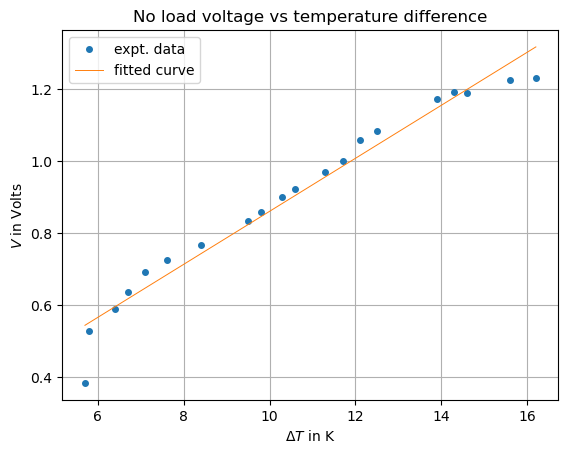

Seebeck coefficient: slope/142=0.0005190431783768795V/K. Std dev=0.0002925022730468559V/K.


In [6]:
xdata = s1data['del T'].to_numpy()
ydata = s1data['V'].to_numpy()

popts1, pcovs1 = curve_fit(linfn, xdata, ydata)
print(f'fitting parameters: {popts1}, error (std dev): {np.sqrt(np.diag(pcovs1))}')

x1 = np.linspace(xdata[0], xdata[len(xdata)-1], 100)
y1 = linfn(x1, *popts1)

plt.plot(xdata, ydata, 'o', ms=4, label='expt. data')
plt.plot(x1, y1, lw=0.7, label='fitted curve')
plt.title('No load voltage vs temperature difference')
plt.xlabel('$\Delta T$ in K')
plt.ylabel('$V$ in Volts')
plt.legend()
plt.grid()
plt.savefig('s1.png', dpi=150)
plt.show()

print(f'Seebeck coefficient: slope/142={popts1[0]/142}V/K. Std dev={np.sqrt(pcovs1[0][0]/142)}V/K.')

### S2

fitting parameters: [-0.00413742  0.83329939], error (std dev): [9.28796280e-05 4.00653695e-03]


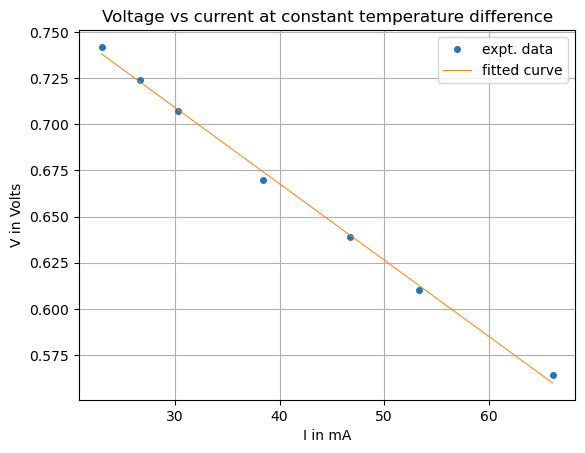

Internal resistance: -4.137419110054476 Ohm. Std dev = 0.002937111728632703 Ohm.


In [7]:
xdata = s21data['I'].to_numpy()
ydata = s21data['V'].to_numpy()

popts21, pcovs21 = curve_fit(linfn, xdata, ydata)
print(f'fitting parameters: {popts21}, error (std dev): {np.sqrt(np.diag(pcovs21))}')

x1 = np.linspace(xdata[0], xdata[len(xdata)-1], 100)
y1 = linfn(x1, *popts21)

plt.plot(xdata, ydata, 'o', ms=4, label='expt. data')
plt.plot(x1, y1, lw=0.7, label='fitted curve')
plt.title('Voltage vs current at constant temperature difference')
plt.xlabel('I in mA')
plt.ylabel('V in Volts')
plt.legend()
plt.grid()
plt.savefig('s21.png', dpi=150)
plt.show()

print(f'Internal resistance: {popts21[0]*1e3} Ohm. Std dev = {np.sqrt(pcovs21[0][0]*1e3)} Ohm.')

fitting parameters: [-0.00662254  1.03056118], error (std dev): [0.00028512 0.0121999 ]


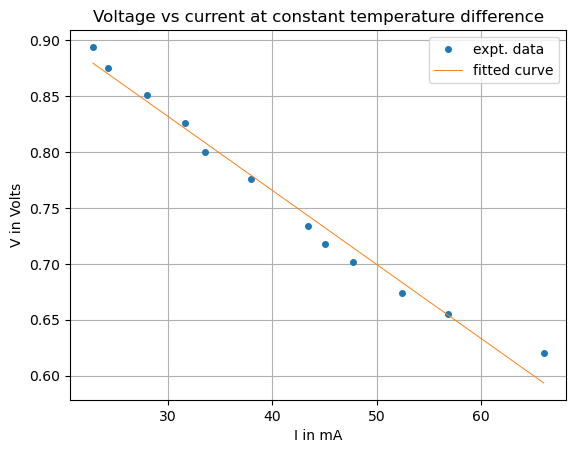

Internal resistance: -6.622541795991828 Ohm. Std dev = 0.009016167103431845 Ohm.


In [8]:
xdata = s22data['I'].to_numpy()
ydata = s22data['V'].to_numpy()

popts22, pcovs22 = curve_fit(linfn, xdata, ydata)
print(f'fitting parameters: {popts22}, error (std dev): {np.sqrt(np.diag(pcovs22))}')

x1 = np.linspace(xdata[0], xdata[len(xdata)-1], 100)
y1 = linfn(x1, *popts22)

plt.plot(xdata, ydata, 'o', ms=4, label='expt. data')
plt.plot(x1, y1, lw=0.7, label='fitted curve')
plt.title('Voltage vs current at constant temperature difference')
plt.xlabel('I in mA')
plt.ylabel('V in Volts')
plt.legend()
plt.grid()
plt.savefig('s22.png', dpi=150)
plt.show()

print(f'Internal resistance: {popts22[0]*1e3} Ohm. Std dev = {np.sqrt(pcovs22[0][0]*1e3)} Ohm.')

### S3

fitting parameters: [  0.0451101   -0.82781074   6.73657677 -14.0377205 ], error (std dev): [ 0.03269998  0.81799148  6.4505555  15.90012291]


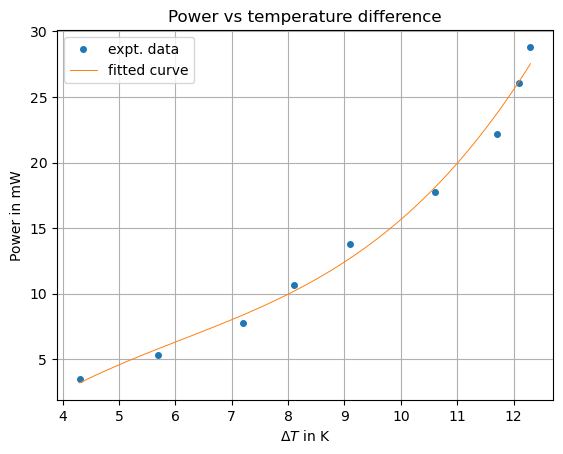

In [9]:
xdata = s3data['del T'].to_numpy()[3:]
ydata = s3data['Power'].to_numpy()[3:]

popts3, pcovs3 = curve_fit(cubicfn, xdata, ydata)
print(f'fitting parameters: {popts3}, error (std dev): {np.sqrt(np.diag(pcovs3))}')

x1 = np.linspace(xdata[0], xdata[len(xdata)-1], 100)
y1 = cubicfn(x1, *popts3)

plt.plot(xdata, ydata, 'o', ms=4, label='expt. data')
plt.plot(x1, y1, lw=0.7, label='fitted curve')
plt.title('Power vs temperature difference')
plt.xlabel('$\Delta T$ in K')
plt.ylabel('Power in mW')
plt.legend()
plt.grid()
plt.savefig('s3.png', dpi=150)
plt.show()

PelT = lambda T: cubicfn(T, *popts3)*1e-3

### S4

fitting parameters: [ 3.12903208e-06 -9.37969331e-03  1.01363747e+01], error (std dev): [2.36899566e-07 2.94043801e-04 7.62718451e-02]


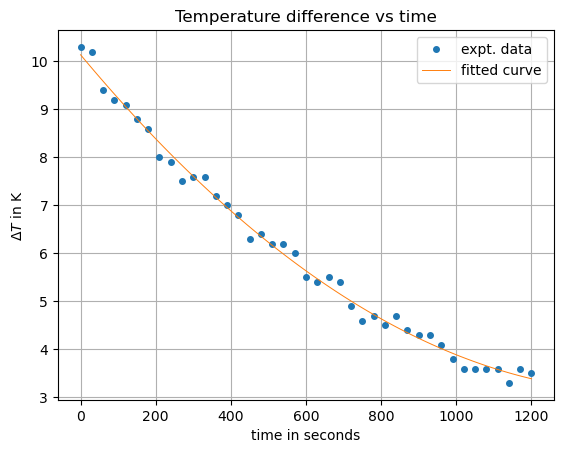

For t=5min, dT/dt=0.007502274065094698, Pth=6.086654967203849.
At 5min, del T = 7.604079583879365. Power P(del T)=0.009156207177426738.
For del T=7.604079583879365, efficiency = 0.15043085613957533%.
For t=10min, dT/dt=0.005624854819728069, Pth=4.56348971408394.
At 10min, del T = 5.63501025115595. Power P(del T)=0.005708770144787194.
For del T=5.63501025115595, efficiency = 0.1250965927932009%.


In [10]:
xdata = s4data['time'].to_numpy()
ydata = s4data['del T'].to_numpy()

popts4, pcovs4 = curve_fit(quadfn, xdata, ydata)
print(f'fitting parameters: {popts4}, error (std dev): {np.sqrt(np.diag(pcovs4))}')

x1 = np.linspace(xdata[0], xdata[len(xdata)-1], 100)
y1 = quadfn(x1, *popts4)

plt.plot(xdata, ydata, 'o', ms=4, label='expt. data')
plt.plot(x1, y1, lw=0.7, label='fitted curve')
plt.title('Temperature difference vs time')
plt.xlabel('time in seconds')
plt.ylabel('$\Delta T$ in K')
plt.legend()
plt.grid()
plt.savefig('s4.png', dpi=150)
plt.show()

dTdt = lambda t: np.abs(2*popts4[0]*t + popts4[1])
c = 811.308
T300 = quadfn(300, *popts4)
T600 = quadfn(600, *popts4)
print(f'For t=5min, dT/dt={dTdt(300)}, Pth={c*dTdt(300)}.')
print(f'At 5min, del T = {T300}. Power P(del T)={PelT(T300)}.')
print(f'For del T={T300}, efficiency = {PelT(T300)*100/(c*dTdt(300))}%.')
print(f'For t=10min, dT/dt={dTdt(600)}, Pth={c*dTdt(600)}.')
print(f'At 10min, del T = {T600}. Power P(del T)={PelT(T600)}.')
print(f'For del T={T600}, efficiency = {PelT(T600)*100/(c*dTdt(600))}%.')

## Peltier Effect (Expt. 1)

fitting parameters for Tc: [-7.0000e-03  2.0916e+01], error (std dev): [0.00095416 0.40074853]
fitting parameters for Th: [ 0.02692821 25.95384615], error (std dev): [0.00099651 0.41853321]


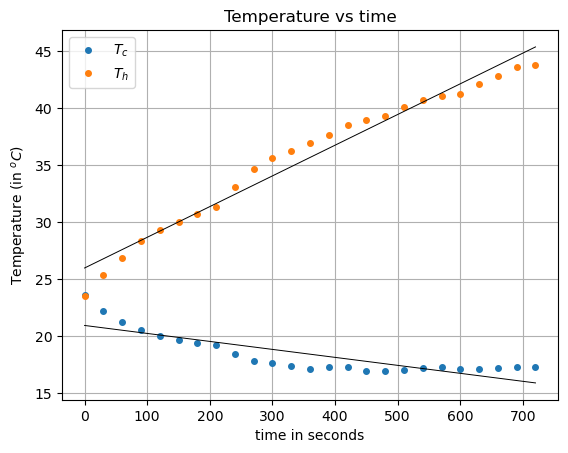

Pel=39.405, Ph=30.186517945147123, Pc=7.847000002461871
Efficiency: nc=19.913716539682454%, nh=76.6058062305472%


In [11]:
xdata = p1data['time'].to_numpy()[:-16]
ydata = p1data['Tc'].to_numpy()[:-16]
plt.plot(xdata, ydata, 'o', ms=4, label='$T_c$')
popt1, pcov1 = curve_fit(linfn, xdata, ydata)
print(f'fitting parameters for Tc: {popt1}, error (std dev): {np.sqrt(np.diag(pcov1))}')
plt.plot(xdata, linfn(xdata, *popt1), lw=0.7, color='black')
Pc = 1121*np.abs(popt1[0])

xdata = p2data['time'].to_numpy()[:-16]
ydata = p2data['Th'].to_numpy()[:-16]
plt.plot(xdata, ydata, 'o', ms=4, label='$T_h$')
popt2, pcov2 = curve_fit(linfn, xdata, ydata)
print(f'fitting parameters for Th: {popt2}, error (std dev): {np.sqrt(np.diag(pcov2))}')
plt.plot(xdata, linfn(xdata, *popt2), lw=0.7, color='black')
Ph = 1121*popt2[0]

plt.title('Temperature vs time')
plt.xlabel('time in seconds')
plt.ylabel('Temperature (in $^oC$)')
plt.legend()
plt.grid()
plt.savefig('p12.png', dpi=150)
plt.show()

Pel = 39.405  # average power
print(f'Pel={Pel}, Ph={Ph}, Pc={Pc}')
print(f'Efficiency: nc={Pc*100/Pel}%, nh={Ph*100/Pel}%')